In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,balanced_accuracy_score,accuracy_score
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier

In [2]:
url="https://raw.githubusercontent.com/kxerxess/Diabetes-Prediction/master/data/diabetes-FINAL.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,...,0,0,0,1,1,0,1176.0,0.120000,0.294985,0
1,1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,...,0,1,0,1,1,1,771.4,0.032258,0.302439,1
2,2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,...,0,0,0,1,1,0,745.6,0.250000,0.188791,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,...,0,1,0,1,1,1,646.3,0.047619,0.223404,1
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,...,0,0,0,1,1,0,1508.5,0.000000,0.196429,0


In [3]:
df = df.drop(columns=['Unnamed: 0','DiabetesPedigreeFunction'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,F0,F1,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,6,148.0,72.0,35.0,169.5,33.6,50,1,0,0,...,0,0,0,1,1,0,1176.0,0.120000,0.294985,0
1,1,85.0,66.0,29.0,102.5,26.6,31,0,0,1,...,0,1,0,1,1,1,771.4,0.032258,0.302439,1
2,8,183.0,64.0,32.0,169.5,23.3,32,1,0,1,...,0,0,0,1,1,0,745.6,0.250000,0.188791,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0,1,1,...,0,1,0,1,1,1,646.3,0.047619,0.223404,1
4,0,137.0,40.0,35.0,168.0,43.1,33,1,0,0,...,0,0,0,1,1,0,1508.5,0.000000,0.196429,0


In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,F0,F1,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,0.544341,0.221898,-0.384007,-0.050784,...,-0.143140,-0.137618,-0.163713,0.017166,-0.109934,-0.501661,0.038719,0.920143,0.163223,-0.036441
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.268910,0.495990,-0.551957,-0.197769,...,-0.163728,-0.439652,-0.143198,-0.323721,-0.152396,-0.162061,0.247806,0.045904,-0.237048,-0.221213
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,0.325135,0.174469,-0.301407,-0.209557,...,-0.199178,-0.203157,-0.177336,-0.054253,-0.737501,-0.265761,0.255185,0.103460,0.067922,-0.196719
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.129537,0.295138,-0.244398,-0.479469,...,-0.576026,-0.354387,-0.654827,-0.146510,-0.129728,-0.137524,0.909917,0.049475,-0.076126,-0.666601
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.123629,0.377081,-0.346669,-0.233823,...,-0.131495,-0.243684,-0.129558,-0.748449,-0.082295,-0.082254,0.231682,0.021325,-0.530392,-0.237244
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.027849,0.315577,-0.205148,-0.757956,...,-0.420449,-0.466149,-0.383152,-0.197311,-0.220807,-0.152008,0.832914,-0.008616,-0.145653,-0.717384
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,1.000000,0.238356,-0.557843,-0.051429,...,-0.177554,-0.188336,-0.179417,-0.012655,-0.224065,-0.390378,0.069710,0.258233,0.334248,-0.028063
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.238356,1.000000,-0.390316,-0.286415,...,-0.187901,-0.273321,-0.195042,-0.136063,-0.114023,-0.190266,0.326248,0.163744,-0.247930,-0.318816
F0,-0.384007,-0.551957,-0.301407,-0.244398,-0.346669,-0.205148,-0.557843,-0.390316,1.000000,0.159231,...,0.229033,0.343999,0.225358,0.206941,0.197714,0.349428,-0.234678,-0.223667,0.016619,0.159135
F1,-0.050784,-0.197769,-0.209557,-0.479469,-0.233823,-0.757956,-0.051429,-0.286415,0.159231,1.000000,...,0.485441,0.554850,0.378004,0.174624,0.163372,0.120063,-0.627399,-0.024399,0.176868,0.590064


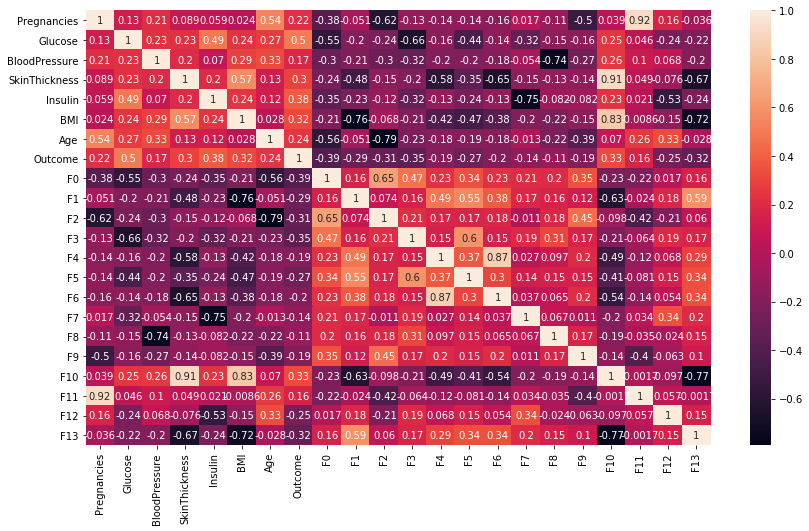

In [5]:
plt.figure(figsize = (14, 8))
sb.heatmap(df.corr(), annot=True)
plt.show()

In [6]:
labels = df.loc[:,'Outcome'].values
features = df.loc[:,df.columns!='Outcome'].values
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

268 500


In [7]:
scaler=MinMaxScaler((0,1))
x=scaler.fit_transform(features)
y=labels
xTrain,xTest,yTrain,yTest=tts(x, y, test_size=0.2, random_state=42)

In [8]:
values = {}

### LogisticRegression

In [9]:
clf=LogisticRegression()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))
values["LogisticRegression"]=accuracy_score(yTest,pred)


              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



###  RandomForestClassifier

In [10]:
clf=RandomForestClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))
values["RandomForestClassifier"]=accuracy_score(yTest,pred)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



### SVC

In [11]:
clf=SVC()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))
values["SVC"]=accuracy_score(yTest,pred)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



### KNeighborsClassifier

In [12]:
clf=KNeighborsClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))
values["KNeighborsClassifier"]=accuracy_score(yTest,pred)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        99
           1       0.57      0.58      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154



### DecisionTreeClassifier

In [13]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = dtree.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))
values["DecisionTreeClassifier"]=accuracy_score(yTest,pred)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        99
           1       0.80      0.80      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



### AdaBoostClassifier

In [14]:
clf=AdaBoostClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))
accuracy_score(yTest,pred)
values["AdaBoostClassifier"]=accuracy_score(yTest,pred)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.77      0.78      0.77        55

    accuracy                           0.84       154
   macro avg       0.82      0.83      0.82       154
weighted avg       0.84      0.84      0.84       154



### BaggingClassifier


In [15]:
clf=BaggingClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))
values["BaggingClassifier"]=accuracy_score(yTest,pred)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        99
           1       0.79      0.82      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



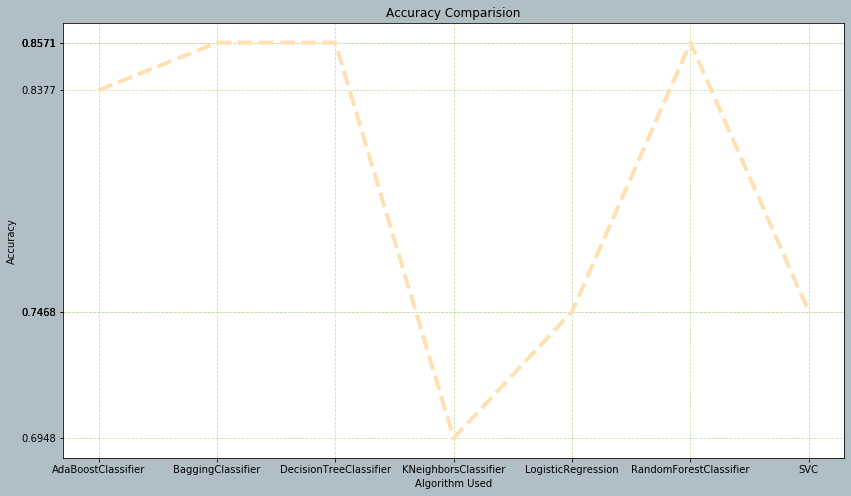

In [16]:
lists = sorted(values.items())
x, y = zip(*lists)
plt.figure(figsize=[14,8],facecolor="#b0bec5")
plt.xlabel("Algorithm Used")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision")
plt.plot(x,y, color ="#ffe0b2", alpha=1, linestyle="--", linewidth=4, marker="o", markersize=2)
plt.yticks(y)
plt.grid(color="#c5e1a5", linestyle="--")
plt.show()